# <center> Classification </center>

In [1]:
# prevent SSL: CERTIFICATE_VERIFY_FAILED
# https://stackoverflow.com/questions/27835619/urllib-and-ssl-certificate-verify-failed-error
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


## <center> MNIST </center>

In [ ]:
# download MNIST dataset into directory 'data' on relative path
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home='data', as_frame=False)
mnist.keys()


In [3]:
# view data and target shape
X, y = mnist["data"], mnist["target"]
print(X.shape)  # 70,000 images, each image has 784 features
print(y.shape)  # 70,000 labels


(70000, 784)
(70000,)


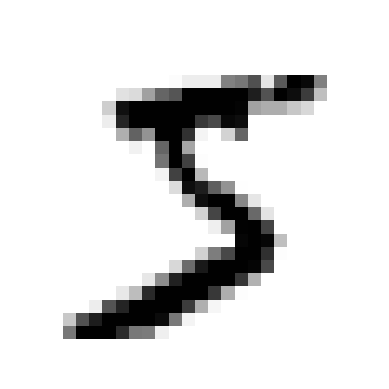

5


In [4]:
# view one digit from the dataset
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

# view the label
print(y[0])


In [5]:
# convert label from string to integer
import numpy as np
y = y.astype(np.uint8)


In [6]:
# separate training set and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


## <center> Training a Binary Classifier </center>
Distinguishing between two classes, 5 and not-5.

In [7]:
# train a binary classifier to detect one digit
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)


In [8]:
# use Stochastic Gradient Descent (SGD) classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# detect images of the number 5
sgd_clf.predict([some_digit])


array([ True])

## <center> Performance Measures </center>